In [25]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from keras import layers

low_noise = np.random.rand(1, 10000) / 6
medium_noise = np.random.rand(1, 10000)
high_noise = np.random.rand(1, 10000) * 5
very_high_noise = np.random.rand(1, 10000) * 50

def np_noise(up_to_index, amount): # low | medium | high | very_high
  if amount == "low":
    return low_noise[:, :up_to_index].reshape((up_to_index, ))
  if amount == "medium":
    return medium_noise[:, :up_to_index].reshape((up_to_index, ))
  if amount == "high":
    return high_noise[:, :up_to_index].reshape((up_to_index, ))
  if amount == "very_high":
    return very_high_noise[:, :up_to_index].reshape((up_to_index, ))

In [22]:
def run(layers_generator, np_func = np.cos, train_bound = 5, number_of_train_points = 1000, test_bound = 5,
        number_of_test_points = 1000, number_of_iterations = 1000, batch_size = 1000,
        noise = "none"): # none | low | medium | high | very_high
  train_data = np.linspace(-1 * train_bound, train_bound, number_of_train_points)
  train_targets = np_func(train_data)
  if noise != "none":
    train_targets += np_noise(len(train_data), noise)
  train_data = tensorflow.expand_dims(train_data, axis=-1)

  test_data = np.linspace(-1 * test_bound, test_bound, number_of_test_points)
  test_targets = np_func(test_data)
  if noise != "none":
    test_targets += np_noise(len(test_targets), noise)
  test_data = tensorflow.expand_dims(test_data, axis=-1)

  model = keras.Sequential(layers_generator())
  model.compile(optimizer="adam", loss="mse", metrics=["mae"])
  if batch_size == 0:
    model.fit(train_data, train_targets, epochs = number_of_iterations, verbose = 0)
  else:
    model.fit(train_data, train_targets, epochs = number_of_iterations, batch_size = batch_size, verbose = 0)
  test_mse, test_mae = model.evaluate(test_data, test_targets)
  print(test_mae)

  plt.plot(test_data, test_targets, 'g', label = 'Original Function')
  plt.plot(test_data, model.predict(test_data), 'r', label = 'Predicted Function')
  plt.show()


In [7]:
def np_polynomial(x):
  return 2 * x ** 3 + 3 * x ** 2 + 4 * x + 1

def np_func3(x):
  return np.cos(2 * x) + np.sin(x)

32/32 [==============================] - 0s 5ms/step - loss: 2.0327e-06 - mae: 0.0010
0.00104760960675776


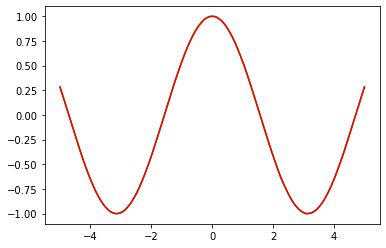

32/32 [==============================] - 0s 4ms/step - loss: 187.4339 - mae: 7.9319
7.931916236877441


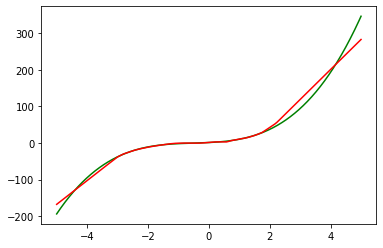

32/32 [==============================] - 1s 5ms/step - loss: 0.0143 - mae: 0.0601
0.06008782982826233


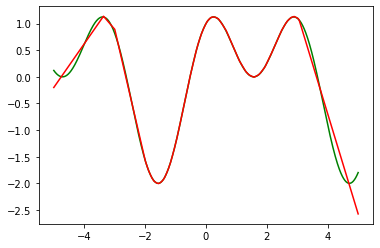

In [10]:
run(layers_generator = lambda: [layers.Dense(1), layers.Dense(100, activation="relu"), layers.Dense(50, activation="relu"), layers.Dense(1)])
run(layers_generator = lambda: [layers.Dense(1), layers.Dense(100, activation="relu"), layers.Dense(50, activation="relu"), layers.Dense(1)],
    np_func = np_polynomial)
run(layers_generator = lambda: [layers.Dense(1), layers.Dense(100, activation="relu"), layers.Dense(50, activation="relu"), layers.Dense(1)],
    np_func = np_func3)

32/32 [==============================] - 0s 6ms/step - loss: 0.0025 - mae: 0.0429
0.04286009445786476


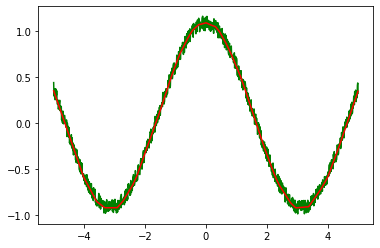

32/32 [==============================] - 0s 5ms/step - loss: 140.8093 - mae: 8.2807
8.28073787689209


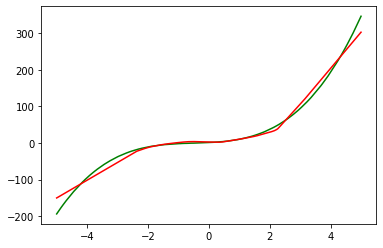

32/32 [==============================] - 0s 5ms/step - loss: 0.0166 - mae: 0.0828
0.08275263756513596


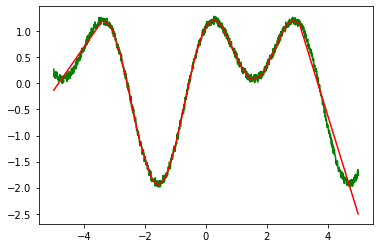

32/32 [==============================] - 1s 7ms/step - loss: 0.0814 - mae: 0.2467
0.24674008786678314


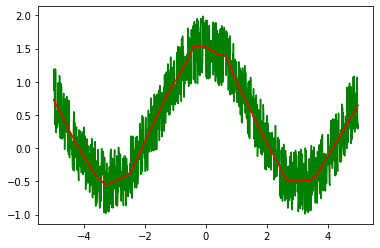

32/32 [==============================] - 0s 6ms/step - loss: 168.2151 - mae: 9.6143
9.614349365234375


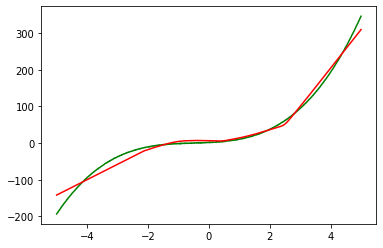

32/32 [==============================] - 0s 5ms/step - loss: 0.0909 - mae: 0.2564
0.2564428746700287


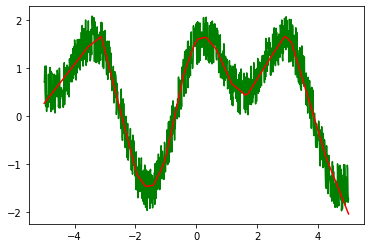

32/32 [==============================] - 0s 5ms/step - loss: 2.1110 - mae: 1.2656
1.2655717134475708


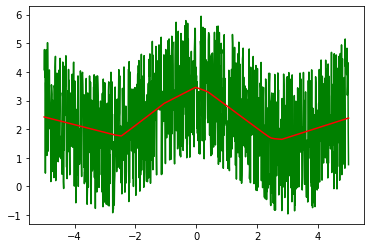

32/32 [==============================] - 0s 6ms/step - loss: 196.2291 - mae: 10.6938
10.693794250488281


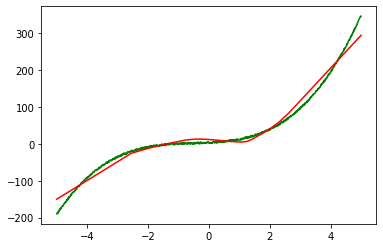

32/32 [==============================] - 0s 5ms/step - loss: 2.1007 - mae: 1.2628
1.2628244161605835


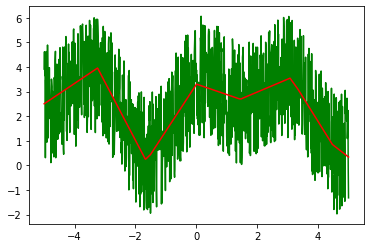

32/32 [==============================] - 0s 5ms/step - loss: 198.7672 - mae: 12.1882
12.188193321228027


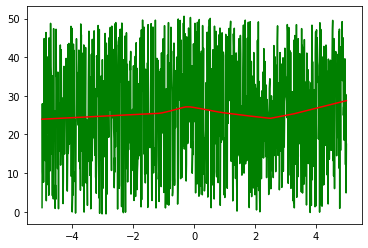

32/32 [==============================] - 0s 5ms/step - loss: 508.3162 - mae: 17.7182
17.718154907226562


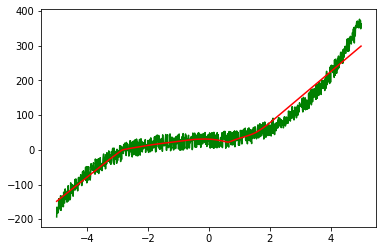

32/32 [==============================] - 0s 5ms/step - loss: 200.8369 - mae: 12.2193
12.219341278076172


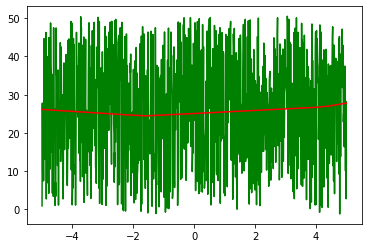

In [23]:
for noise in ['low', 'medium', 'high', 'very_high']:
  run(layers_generator = lambda: [layers.Dense(1), layers.Dense(100, activation="relu"), layers.Dense(50, activation="relu"), layers.Dense(1)]
      , noise=noise)
  run(layers_generator = lambda: [layers.Dense(1), layers.Dense(100, activation="relu"), layers.Dense(50, activation="relu"), layers.Dense(1)],
      np_func = np_polynomial
      , noise=noise)
  run(layers_generator = lambda: [layers.Dense(1), layers.Dense(100, activation="relu"), layers.Dense(50, activation="relu"), layers.Dense(1)],
      np_func = np_func3
      , noise=noise)

32/32 [==============================] - 0s 3ms/step - loss: 0.0038 - mae: 0.0464
0.04642753675580025


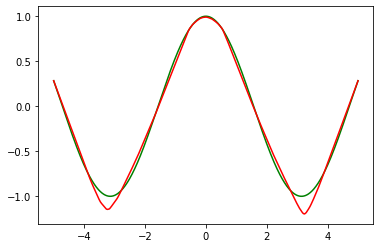

32/32 [==============================] - 0s 3ms/step - loss: 544.0324 - mae: 18.4877
18.48772621154785


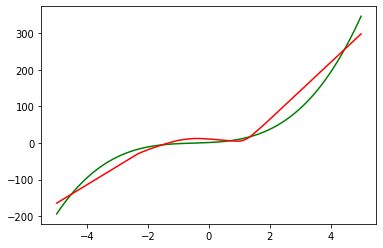

32/32 [==============================] - 0s 3ms/step - loss: 0.0651 - mae: 0.2027
0.20274314284324646


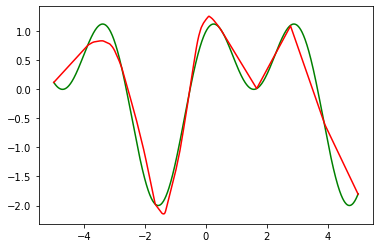

In [17]:
run(layers_generator = lambda: [layers.Dense(1), layers.Dense(100, activation="relu"), layers.Dense(50, activation="relu"), layers.Dense(1)],
    number_of_train_points = 10)
run(layers_generator = lambda: [layers.Dense(1), layers.Dense(100, activation="relu"), layers.Dense(50, activation="relu"), layers.Dense(1)],
    np_func = np_polynomial,
    number_of_train_points = 10)
run(layers_generator = lambda: [layers.Dense(1), layers.Dense(100, activation="relu"), layers.Dense(50, activation="relu"), layers.Dense(1)],
    np_func = np_func3,
    number_of_train_points = 10)

32/32 [==============================] - 0s 6ms/step - loss: 0.0077 - mae: 0.0696
0.06962209194898605


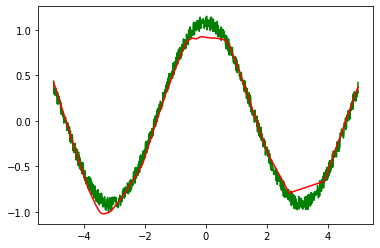

32/32 [==============================] - 0s 6ms/step - loss: 0.1914 - mae: 0.3587
0.35871756076812744


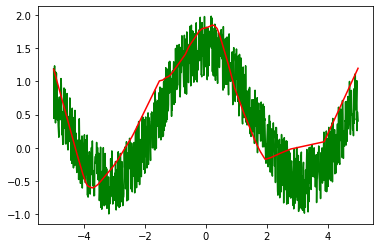

32/32 [==============================] - 0s 5ms/step - loss: 4.2144 - mae: 1.6594
1.6594008207321167


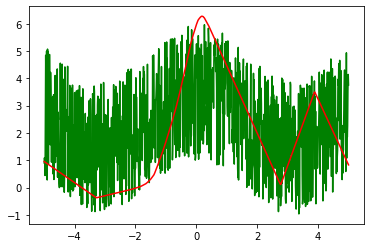

32/32 [==============================] - 0s 5ms/step - loss: 382.6107 - mae: 16.2223
16.222322463989258


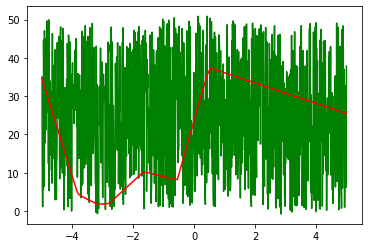

32/32 [==============================] - 0s 6ms/step - loss: 945.5533 - mae: 25.0236
25.023574829101562


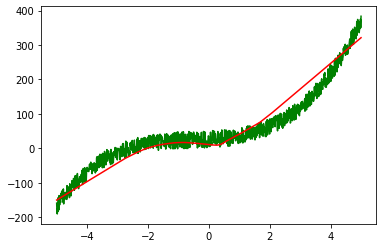

32/32 [==============================] - 0s 6ms/step - loss: 389.0052 - mae: 16.4960
16.4959774017334


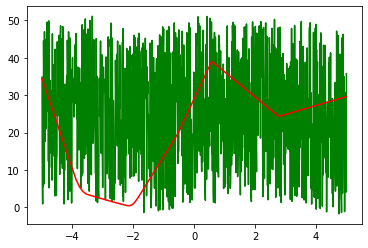

In [26]:
for noise in ['low', 'medium', 'high', 'very_high']:
  run(layers_generator = lambda: [layers.Dense(1), layers.Dense(100, activation="relu"), layers.Dense(50, activation="relu"), layers.Dense(1)],
    number_of_train_points = 10
    , noise = noise)
run(layers_generator = lambda: [layers.Dense(1), layers.Dense(100, activation="relu"), layers.Dense(50, activation="relu"), layers.Dense(1)],
    np_func = np_polynomial,
    number_of_train_points = 10
    , noise = noise)
run(layers_generator = lambda: [layers.Dense(1), layers.Dense(100, activation="relu"), layers.Dense(50, activation="relu"), layers.Dense(1)],
    np_func = np_func3,
    number_of_train_points = 10
    , noise = noise)

32/32 [==============================] - 0s 3ms/step - loss: 0.1307 - mae: 0.2787
0.27871620655059814


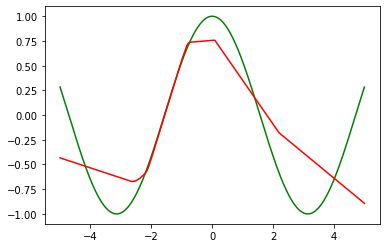

32/32 [==============================] - 1s 3ms/step - loss: 2248.9221 - mae: 36.9389
36.93890380859375


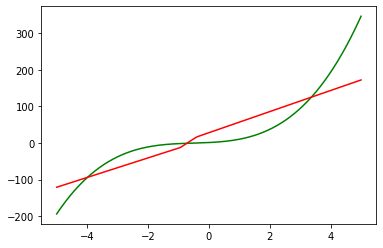

32/32 [==============================] - 0s 3ms/step - loss: 0.4091 - mae: 0.5611
0.5611050128936768


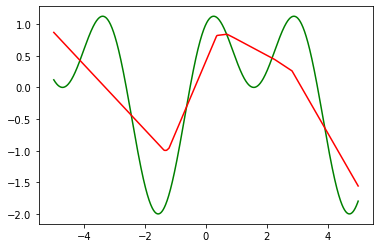

In [18]:
run(layers_generator = lambda: [layers.Dense(1), layers.Dense(20, activation="relu"), layers.Dense(1)],)
run(layers_generator = lambda: [layers.Dense(1), layers.Dense(20, activation="relu"), layers.Dense(1)],
    np_func = np_polynomial)
run(layers_generator = lambda: [layers.Dense(1), layers.Dense(20, activation="relu"), layers.Dense(1)],
    np_func = np_func3)

In [ ]:
for noise in ['low', 'medium', 'high', 'very_high']:
  run(layers_generator = lambda: [layers.Dense(1), layers.Dense(20, activation="relu"), layers.Dense(1)],
      noise = noise)
  run(layers_generator = lambda: [layers.Dense(1), layers.Dense(20, activation="relu"), layers.Dense(1)],
    np_func = np_polynomial,
    noise = noise)
  run(layers_generator = lambda: [layers.Dense(1), layers.Dense(20, activation="relu"), layers.Dense(1)],
    np_func = np_func3,
    noise = noise)

32/32 [==============================] - 0s 3ms/step - loss: 3.6972e-04 - mae: 0.0118
0.011786273680627346


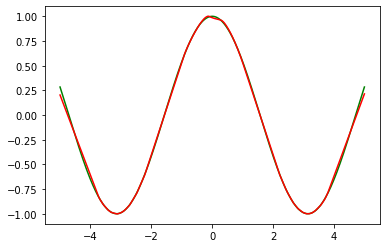

32/32 [==============================] - 0s 3ms/step - loss: 782.1328 - mae: 21.2713
21.27134895324707


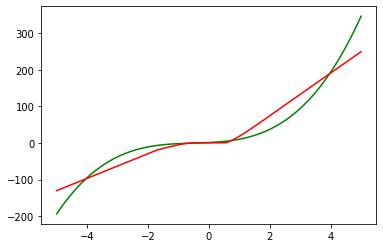

32/32 [==============================] - 0s 3ms/step - loss: 0.2758 - mae: 0.4163
0.4162973165512085


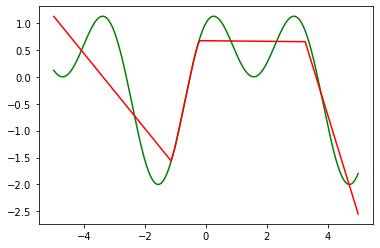

In [19]:
run(layers_generator = lambda: [layers.Dense(1), layers.Dense(500, activation="relu"), layers.Dense(1)],)
run(layers_generator = lambda: [layers.Dense(1), layers.Dense(500, activation="relu"), layers.Dense(1)],
    np_func = np_polynomial)
run(layers_generator = lambda: [layers.Dense(1), layers.Dense(500, activation="relu"), layers.Dense(1)],
    np_func = np_func3)

In [ ]:
for noise in ['low', 'medium', 'high', 'very_high']:
  run(layers_generator = lambda: [layers.Dense(1), layers.Dense(500, activation="relu"), layers.Dense(1)],
      noise = noise)
  run(layers_generator = lambda: [layers.Dense(1), layers.Dense(500, activation="relu"), layers.Dense(1)],
    np_func = np_polynomial,
    noise = noise)
  run(layers_generator = lambda: [layers.Dense(1), layers.Dense(500, activation="relu"), layers.Dense(1)],
    np_func = np_func3,
    noise = noise)

32/32 [==============================] - 0s 3ms/step - loss: 0.1951 - mae: 0.3732
0.37324151396751404


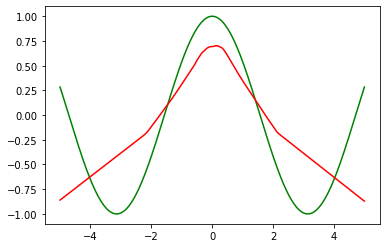

32/32 [==============================] - 0s 3ms/step - loss: 10183.6514 - mae: 63.2959
63.2959098815918


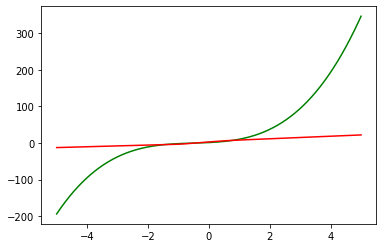

32/32 [==============================] - 0s 3ms/step - loss: 0.3542 - mae: 0.5298
0.5298406481742859


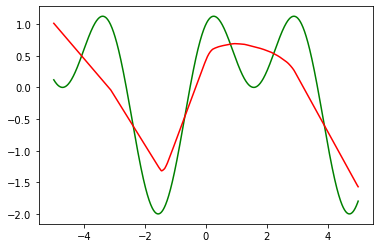

In [20]:
run(layers_generator = lambda: [layers.Dense(1), layers.Dense(100, activation="relu"), layers.Dense(50, activation="relu"), layers.Dense(1)],
    number_of_iterations = 100)
run(layers_generator = lambda: [layers.Dense(1), layers.Dense(100, activation="relu"), layers.Dense(50, activation="relu"), layers.Dense(1)],
    np_func = np_polynomial,
    number_of_iterations = 100)
run(layers_generator = lambda: [layers.Dense(1), layers.Dense(100, activation="relu"), layers.Dense(50, activation="relu"), layers.Dense(1)],
    np_func = np_func3,
    number_of_iterations = 100)

In [ ]:
for noise in ['low', 'medium', 'high', 'very_high']:
  run(layers_generator = lambda: [layers.Dense(1), layers.Dense(100, activation="relu"), layers.Dense(50, activation="relu"), layers.Dense(1)],
    number_of_iterations = 100,
    noise = noise)
  run(layers_generator = lambda: [layers.Dense(1), layers.Dense(100, activation="relu"), layers.Dense(50, activation="relu"), layers.Dense(1)],
      np_func = np_polynomial,
      number_of_iterations = 100,
      noise = noise)
  run(layers_generator = lambda: [layers.Dense(1), layers.Dense(100, activation="relu"), layers.Dense(50, activation="relu"), layers.Dense(1)],
      np_func = np_func3,
      number_of_iterations = 100,
      noise = noise)

32/32 [==============================] - 0s 3ms/step - loss: 1.5148e-04 - mae: 0.0067
0.006742846220731735


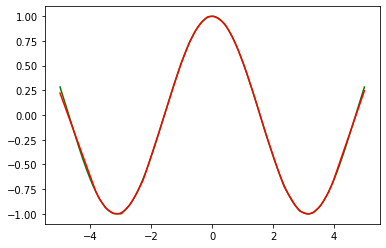

32/32 [==============================] - 0s 3ms/step - loss: 1175.0060 - mae: 27.3926
27.39263343811035


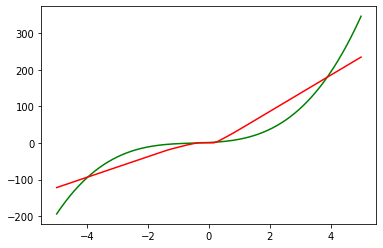

32/32 [==============================] - 0s 3ms/step - loss: 0.0709 - mae: 0.1752
0.1751595437526703


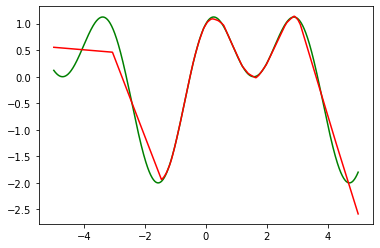

In [21]:
run(layers_generator = lambda: [layers.Dense(1), layers.Dense(100, activation="relu"), layers.Dense(50, activation="relu"), layers.Dense(1)],
    number_of_iterations = 500)
run(layers_generator = lambda: [layers.Dense(1), layers.Dense(100, activation="relu"), layers.Dense(50, activation="relu"), layers.Dense(1)],
    np_func = np_polynomial,
    number_of_iterations = 500)
run(layers_generator = lambda: [layers.Dense(1), layers.Dense(100, activation="relu"), layers.Dense(50, activation="relu"), layers.Dense(1)],
    np_func = np_func3,
    number_of_iterations = 500)

In [ ]:
for noise in ['low', 'medium', 'high', 'very_high']:
  run(layers_generator = lambda: [layers.Dense(1), layers.Dense(100, activation="relu"), layers.Dense(50, activation="relu"), layers.Dense(1)],
    number_of_iterations = 500,
    noise = noise)
  run(layers_generator = lambda: [layers.Dense(1), layers.Dense(100, activation="relu"), layers.Dense(50, activation="relu"), layers.Dense(1)],
      np_func = np_polynomial,
      number_of_iterations = 500,
      noise = noise)
  run(layers_generator = lambda: [layers.Dense(1), layers.Dense(100, activation="relu"), layers.Dense(50, activation="relu"), layers.Dense(1)],
      np_func = np_func3,
    number_of_iterations = 500,
    noise = noise)

32/32 [==============================] - 0s 3ms/step - loss: 2.1711e-06 - mae: 0.0011
0.0011107531609013677


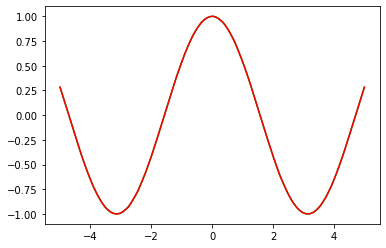

32/32 [==============================] - 0s 3ms/step - loss: 5.0656 - mae: 1.2451
1.245090126991272


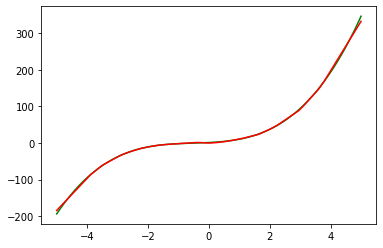

32/32 [==============================] - 0s 3ms/step - loss: 0.0017 - mae: 0.0195
0.01953362673521042


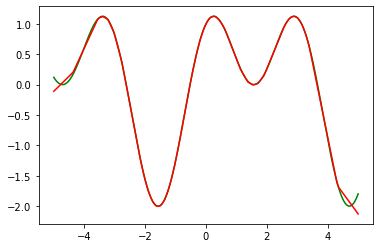

In [22]:
run(layers_generator = lambda: [layers.Dense(1), layers.Dense(100, activation="relu"), layers.Dense(50, activation="relu"), layers.Dense(1)],
    number_of_iterations = 2000)
run(layers_generator = lambda: [layers.Dense(1), layers.Dense(100, activation="relu"), layers.Dense(50, activation="relu"), layers.Dense(1)],
    np_func = np_polynomial,
    number_of_iterations = 2000)
run(layers_generator = lambda: [layers.Dense(1), layers.Dense(100, activation="relu"), layers.Dense(50, activation="relu"), layers.Dense(1)],
    np_func = np_func3,
    number_of_iterations = 2000)

In [ ]:
for noise in ['low', 'medium', 'high', 'very_high']:
  run(layers_generator = lambda: [layers.Dense(1), layers.Dense(100, activation="relu"), layers.Dense(50, activation="relu"), layers.Dense(1)],
    number_of_iterations = 2000,
    noise = noise)
  run(layers_generator = lambda: [layers.Dense(1), layers.Dense(100, activation="relu"), layers.Dense(50, activation="relu"), layers.Dense(1)],
      np_func = np_polynomial,
      number_of_iterations = 2000,
      noise = noise)
  run(layers_generator = lambda: [layers.Dense(1), layers.Dense(100, activation="relu"), layers.Dense(50, activation="relu"), layers.Dense(1)],
      np_func = np_func3,
      number_of_iterations = 2000,
      noise = noise)

32/32 [==============================] - 0s 3ms/step - loss: 1.5425e-04 - mae: 0.0076
0.007551480550318956


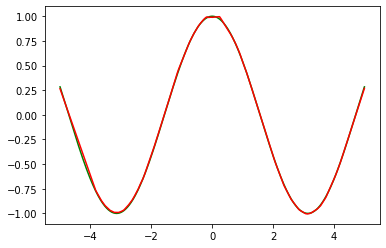

32/32 [==============================] - 0s 3ms/step - loss: 48601.0898 - mae: 183.9787
183.9786834716797


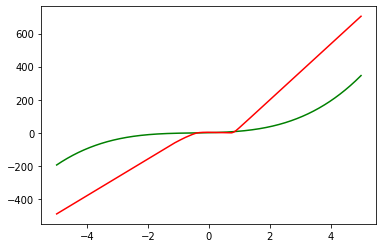

32/32 [==============================] - 0s 3ms/step - loss: 0.0208 - mae: 0.0699
0.06991996616125107


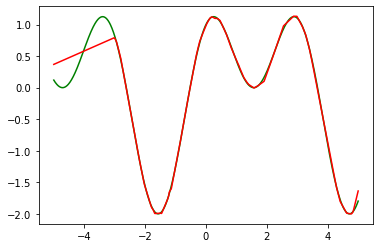

In [23]:
run(layers_generator = lambda: [layers.Dense(1), layers.Dense(100, activation="relu"), layers.Dense(50, activation="relu"), layers.Dense(1)],
    train_bound = 10)
run(layers_generator = lambda: [layers.Dense(1), layers.Dense(100, activation="relu"), layers.Dense(50, activation="relu"), layers.Dense(1)],
    np_func = np_polynomial,
    train_bound = 10)
run(layers_generator = lambda: [layers.Dense(1), layers.Dense(100, activation="relu"), layers.Dense(50, activation="relu"), layers.Dense(1)],
    np_func = np_func3,
    train_bound = 10)

In [ ]:
for noise in ['low', 'medium', 'high', 'very_high']:
  run(layers_generator = lambda: [layers.Dense(1), layers.Dense(100, activation="relu"), layers.Dense(50, activation="relu"), layers.Dense(1)],
    train_bound = 10,
    noise = noise)
  run(layers_generator = lambda: [layers.Dense(1), layers.Dense(100, activation="relu"), layers.Dense(50, activation="relu"), layers.Dense(1)],
      np_func = np_polynomial,
      train_bound = 10,
      noise = noise)
  run(layers_generator = lambda: [layers.Dense(1), layers.Dense(100, activation="relu"), layers.Dense(50, activation="relu"), layers.Dense(1)],
      np_func = np_func3,
      train_bound = 10,
      noise = noise)

32/32 [==============================] - 0s 3ms/step - loss: 5.4611 - mae: 1.2957
1.295670747756958


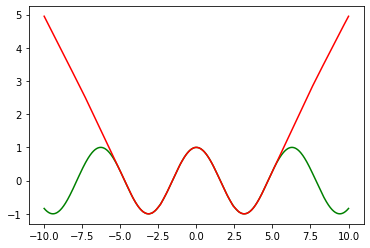

32/32 [==============================] - 0s 3ms/step - loss: 275214.3125 - mae: 308.6764
308.6763916015625


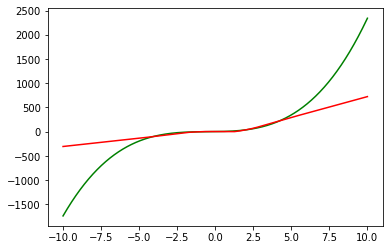

32/32 [==============================] - 0s 3ms/step - loss: 15.4642 - mae: 2.2593
2.259310722351074


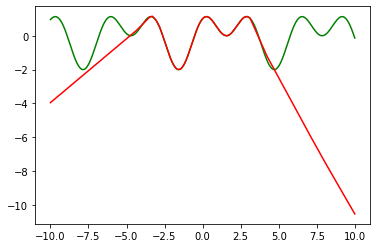

In [24]:
run(layers_generator = lambda: [layers.Dense(1), layers.Dense(100, activation="relu"), layers.Dense(50, activation="relu"), layers.Dense(1)],
    test_bound = 10)
run(layers_generator = lambda: [layers.Dense(1), layers.Dense(100, activation="relu"), layers.Dense(50, activation="relu"), layers.Dense(1)],
    np_func = np_polynomial,
    test_bound = 10)
run(layers_generator = lambda: [layers.Dense(1), layers.Dense(100, activation="relu"), layers.Dense(50, activation="relu"), layers.Dense(1)],
    np_func = np_func3,
    test_bound = 10)

In [ ]:
for noise in ['low', 'medium', 'high', 'very_high']:
  run(layers_generator = lambda: [layers.Dense(1), layers.Dense(100, activation="relu"), layers.Dense(50, activation="relu"), layers.Dense(1)],
    test_bound = 10,
    noise = noise)
  run(layers_generator = lambda: [layers.Dense(1), layers.Dense(100, activation="relu"), layers.Dense(50, activation="relu"), layers.Dense(1)],
      np_func = np_polynomial,
      test_bound = 10,
      noise = noise)
  run(layers_generator = lambda: [layers.Dense(1), layers.Dense(100, activation="relu"), layers.Dense(50, activation="relu"), layers.Dense(1)],
      np_func = np_func3,
      test_bound = 10,
      noise = noise)